In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from BEER_curve import BEER_curve

(-0.0001, 0.0001)

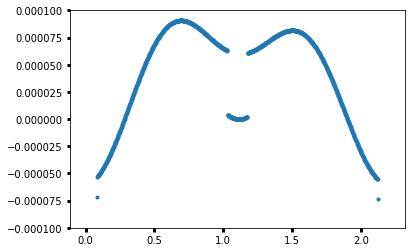

In [11]:
params = {
    "per": 2.204733,
    "i": 83.1,
    "a": 4.15,
    "T0": 0.,
    "p": 1./12.85,
    "linLimb": 0.314709,
    "quadLimb": 0.312125,
    "b": 0.499,
    "Aellip": 37.e-6,
    "Abeam": 5.e-6,
    "F0": 0.,
    "Aplanet": 60.e-6,
    "phase_shift": 0.
}

time = np.linspace(0, 2*params['per'], 1000)

BC = BEER_curve(time, params)
y = BC.all_signals()

plt.scatter(time % params['per'], y, marker='.')
plt.ylim([-0.0001, 0.0001])
#plt.ylim([1 - 0.0001, 1 + 0.0001])
#plt.ylim([2 - 0.0001, 2 + 0.0001])

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 14
    # data points      = 1000
    # variables        = 4
    chi-square         = 0.00101161
    reduced chi-square = 1.0157e-06
    Akaike info crit   = -13795.9707
    Bayesian info crit = -13776.3396
[[Variables]]
    per:          2.204733 (fixed)
    i:            83.1 (fixed)
    a:            4.15 (fixed)
    T0:           0 (fixed)
    p:            0.07782101 (fixed)
    linLimb:      0.314709 (fixed)
    quadLimb:     0.312125 (fixed)
    b:            0.499 (fixed)
    Aellip:       3.7000e-05 +/- 2.6456e-05 (71.50%) (init = 3.7e-05)
    Abeam:        5.0000e-06 +/- 4.5113e-05 (902.27%) (init = 5e-06)
    F0:           5.5255e-05 +/- 4.2287e-14 (0.00%) (init = 0)
    Aplanet:      6.0000e-05 +/- 4.8459e-05 (80.76%) (init = 6e-05)
    phase_shift:  0 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(Aellip, F0) = -0.178


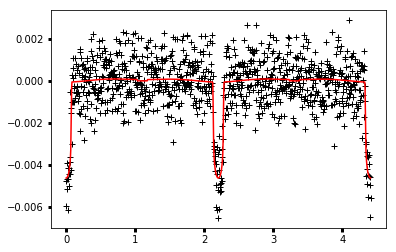

In [18]:
#Now trying to learn how to use lmfit - https://lmfit.github.io/lmfit-py/parameters.html#simple-example
from lmfit import Minimizer, Parameters, report_fit
from numpy.random import normal

# define objective function: returns the array to be minimized
def fcn2min(params, time, data):
    
    BC = BEER_curve(time, params)    
    model = BC.all_signals()
    
    return model - data

std = 0.001 # scatter
noisy_y = y + std*normal(size=len(y))

# create a set of Parameters
params = Parameters()
params.add('per', value=2.204733, vary=False)
params.add('i', value=83.1, vary=False)
params.add('a', value=4.15, vary=False)
params.add('T0', value=0., vary=False)
params.add('p', value=1./12.85, vary=False)
params.add('linLimb', value=0.314709, vary=False)
params.add('quadLimb', value=0.312125, vary=False)
params.add('b', value=0.499, vary=False)
params.add('Aellip', value=37.e-6, min=0., max=100e-6)
params.add('Abeam', value=5.e-6, min=0., max=10e-6)
params.add('F0', value=0., min=0., max=100e-6)
params.add('Aplanet', value=60.e-6, min=0., max=100e-6)
params.add('phase_shift', value=0., vary=False)

# do fit, here with leastsq model
data = noisy_y
minner = Minimizer(fcn2min, params, fcn_args=(time, data))
result = minner.minimize()

# calculate final result
final = data + result.residual

# write error report
report_fit(result)

# try to plot results
try:
    plt.plot(time, data, 'k+')
    plt.plot(time, final, 'r')
except ImportError:
    pass

INFO: Found cached file ./mastDownload/Kepler/kplr010666592_lc_Q111111111111111111/kplr010666592-2009259160929_lpd-targ.fits.gz with expected size 3332920. [astroquery.query]


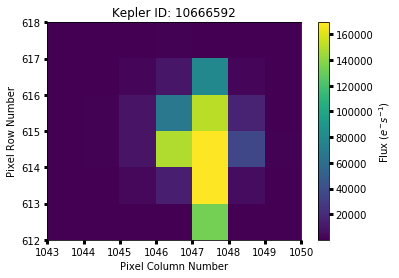

In [35]:
#OK, now let's try to analyze some real HAT-P-7 data
from lightkurve import KeplerTargetPixelFile

quarters = range(0, 17)

tpf = KeplerTargetPixelFile.from_archive('HAT-P-7b', quarter=2, quality_bitmask='hardest')
tpf.plot(frame=1)

In [48]:
from lightkurve import KeplerLightCurveFile
lc = KeplerLightCurveFile.from_archive('HAT-P-7b', quarter=2, quality_bitmask='hardest')

INFO: Found cached file ./mastDownload/Kepler/kplr010666592_lc_Q111111111111111111/kplr010666592-2009259160929_llc.fits with expected size 466560. [astroquery.query]


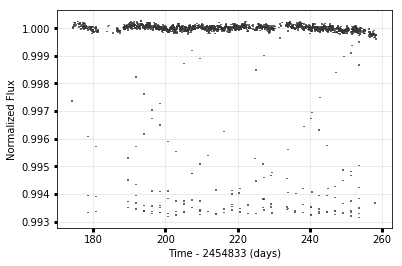

In [49]:
pdcsap_flux = lc.PDCSAP_FLUX
pdcsap_flux.flatten()
pdcsap_flux.plot()

# #Remove nans and outliers
# sap_flux = sap_flux.remove_nans()

# plt.plot(time, sap_flux)

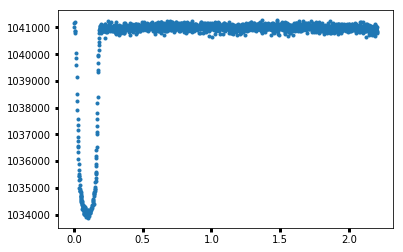

In [54]:
time = pdcsap_flux.time
flux = pdcsap_flux.flux

folded_time = time % params['per']
plt.scatter(folded_time, flux, marker='.')